Test Pandas e Analisi Dati
Analizzare il csv fornito con gli strumenti visti a lezione e scrivere un report dell’analisi andando ad evidenziare I parametri più importanti e le loro relazioni. Provare a dare una risposta all’importanza di alcuni parametri… non solo analizzare ma anche interpretare!
Consegnare un foglio Jupyter con il codice e I commenti sull’analisi entro le ore 13 a: mbagnoli999@gmail.com

In [63]:
#Import delle librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('TMDB  IMDB Movies Dataset.csv')

In [65]:
df.drop(['id', 'backdrop_path', 'homepage', 'poster_path', 'tconst', 'tagline'], axis=1, inplace=True)

In [66]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,...,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,...,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2615046
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2200215
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2946971
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,...,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1409099
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1483869


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 432295 non-null  object 
 1   vote_average          432295 non-null  float64
 2   vote_count            432295 non-null  int64  
 3   status                432295 non-null  object 
 4   release_date          414562 non-null  object 
 5   revenue               432295 non-null  int64  
 6   runtime               432295 non-null  int64  
 7   adult                 432295 non-null  bool   
 8   budget                432295 non-null  int64  
 9   original_language     432295 non-null  object 
 10  original_title        432295 non-null  object 
 11  overview              391238 non-null  object 
 12  popularity            432295 non-null  float64
 13  genres                355422 non-null  object 
 14  production_companies  262127 non-null  object 
 15  

In [68]:
df['status'].unique()

array(['Released', 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [69]:
# Seleziono solo i Released
df= df[df['status'] =='Released']
df.drop('status', axis=1, inplace=True)

### Divido il dataFram in film con e senza data di uscita
I film senza data li anilizzo in seguito per capire se hanno particolati differenze con i primi o meno.

In [70]:
# Film senza data di uscita
df_sn_data = df[df['release_date'].isna() ==True].copy()
df_sn_data.drop('release_date', axis=1, inplace=True)

# Film con data di uscita
df = df[df['release_date'].isna() == False]
df['release_date'] = pd.to_datetime(df['release_date'])

In [71]:
# Inserisco anno e mese su due colonne diverse
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df.drop('release_date', axis=1, inplace=True)

In [72]:
# Restituisce le strighe uniche separando i capi con la virgola
def string_unique_split(df_temp, colonna):
    genres_list = set()
    df_temp.dropna(subset=colonna, inplace=True)
    for gen in df_temp[colonna]:
        for token in gen.split(','):
            genres_list.add(token.replace(' ', ''))
    genres_list= list(genres_list)
    return genres_list

# Converto un dataFrame in un formato per osserevare le correlazioni
def data_convet_to_heatmap(df_temp, max_uniq=6, lista_colonne=None):
    df_temp = df_temp.copy()
    if lista_colonne== None:
        lista_colonne = list(df_temp.columns.values)
    for colonna in lista_colonne:
        df_temp.dropna(subset=colonna, inplace=True)
        uniq = df_temp[colonna].unique()
        if ',' in uniq:
            uniq = string_unique_split(df_temp, colonna)
        
        # Se seno numeri non deve fare niente
        if issubclass(type(uniq[0]), np.float64) or issubclass(type(uniq[0]), np.int64)or issubclass(type(uniq[0]), np.int32):
            continue
        elif len(uniq)<=max_uniq and len(uniq)>1:
            # Se è lungo 2 la conversione è binaria
            if len(uniq)==2 or not issubclass(type(uniq[0]), str):
                df_temp[colonna] = df_temp[colonna].map({uniq[0]:0, uniq[1]:1})
                print(f'Converto {colonna} in 0 o 1')
            else:
                print(f'Converto {colonna} aggiungendo {len(uniq)} colonne, con valore 0 o 1')
                for u in uniq:
                    df_temp[u] = df_temp[colonna].apply(lambda x: 1 if u in x else 0)
                df_temp.drop(colonna, axis=1, inplace=True)
        else:
            print(f"Elimino: {colonna}, len: {len(uniq)}, {type(uniq[0])}")
            df_temp.drop(colonna, axis=1, inplace=True)
    return df_temp
    
new_df =  data_convet_to_heatmap(df)
corr  = new_df.corr()
new_df

Elimino: title, len: 357568, <class 'str'>
Converto adult in 0 o 1
Elimino: original_language, len: 158, <class 'str'>
Elimino: original_title, len: 375759, <class 'str'>
Elimino: overview, len: 374627, <class 'str'>
Elimino: genres, len: 10206, <class 'str'>
Elimino: production_companies, len: 123863, <class 'str'>
Elimino: production_countries, len: 6956, <class 'str'>
Elimino: spoken_languages, len: 5027, <class 'str'>
Elimino: keywords, len: 86998, <class 'str'>
Elimino: directors, len: 50649, <class 'str'>
Elimino: writers, len: 86075, <class 'str'>


,vote_average,vote_count,revenue,runtime,adult,budget,popularity,averageRating,numVotes,release_year,release_month
0,8.364,34495,825532764,148,0,160000000,83.952,8.8,2615046,2010,7
1,8.417,32571,701729206,169,0,165000000,140.241,8.7,2200215,2014,11
2,8.512,30619,1004558444,152,0,185000000,130.643,9.0,2946971,2008,7
3,7.573,29815,2923706026,162,0,237000000,79.932,7.9,1409099,2009,12
4,7.710,29166,1518815515,143,0,220000000,98.082,8.0,1483869,2012,4
...,...,...,...,...,...,...,...,...,...,...,...
432271,0.000,0,0,100,0,0,0.918,6.0,38,1977,5
432281,0.000,0,0,66,0,0,1.970,5.5,24,1998,1
432286,0.000,0,0,58,0,0,0.600,8.1,11,2020,6
432287,0.000,0,0,9,0,15000,0.600,6.8,11,2020,4


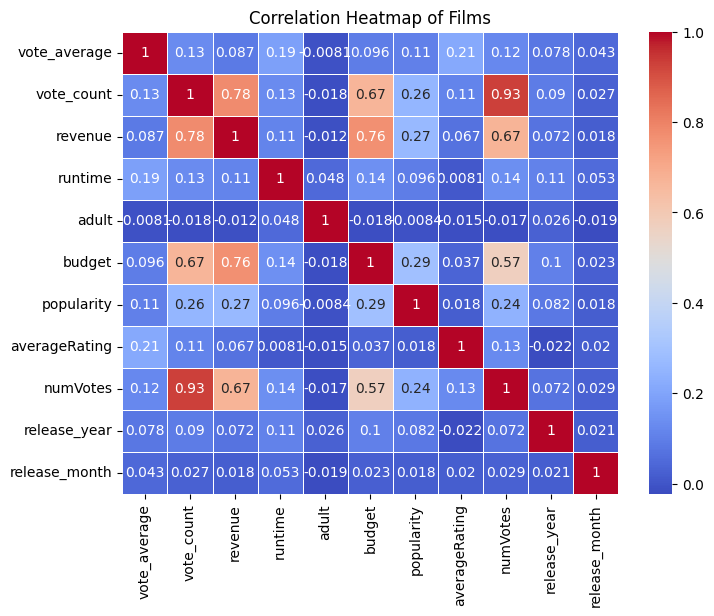

In [73]:
# Plotting Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Films')
plt.show()

### Prime considerazioni:
- Nessuna correlazione tra adult, runtime, mese o anno di uscita con gli altri parametri -> Gli incassi di un film non sembrano dipendere da questi fattori
- Gli incassi di un film (revenue) sembrano dipendere fortemente dall'interesse che questi generano con il: vote_count o numVotes
- Una forte dipendenza degli incassi sembra essere dovuta anche al budget

- Di interesse possono essere il budget, la popolarità, gli incassi, il numero di voti e quindi l'interesse che questi generano

### Vediamo il budget
- Il calcolo della media è viziato dal fatto che ci sono moltissimi film con budget 0
- Questo potrebbe essere dovuto al fatto che questi film siano amatoriale o mancano i dati
    - In questo caso prenderemo solo i film dove il budget è maggiore di 0

Mediana del budget: 4000000.0


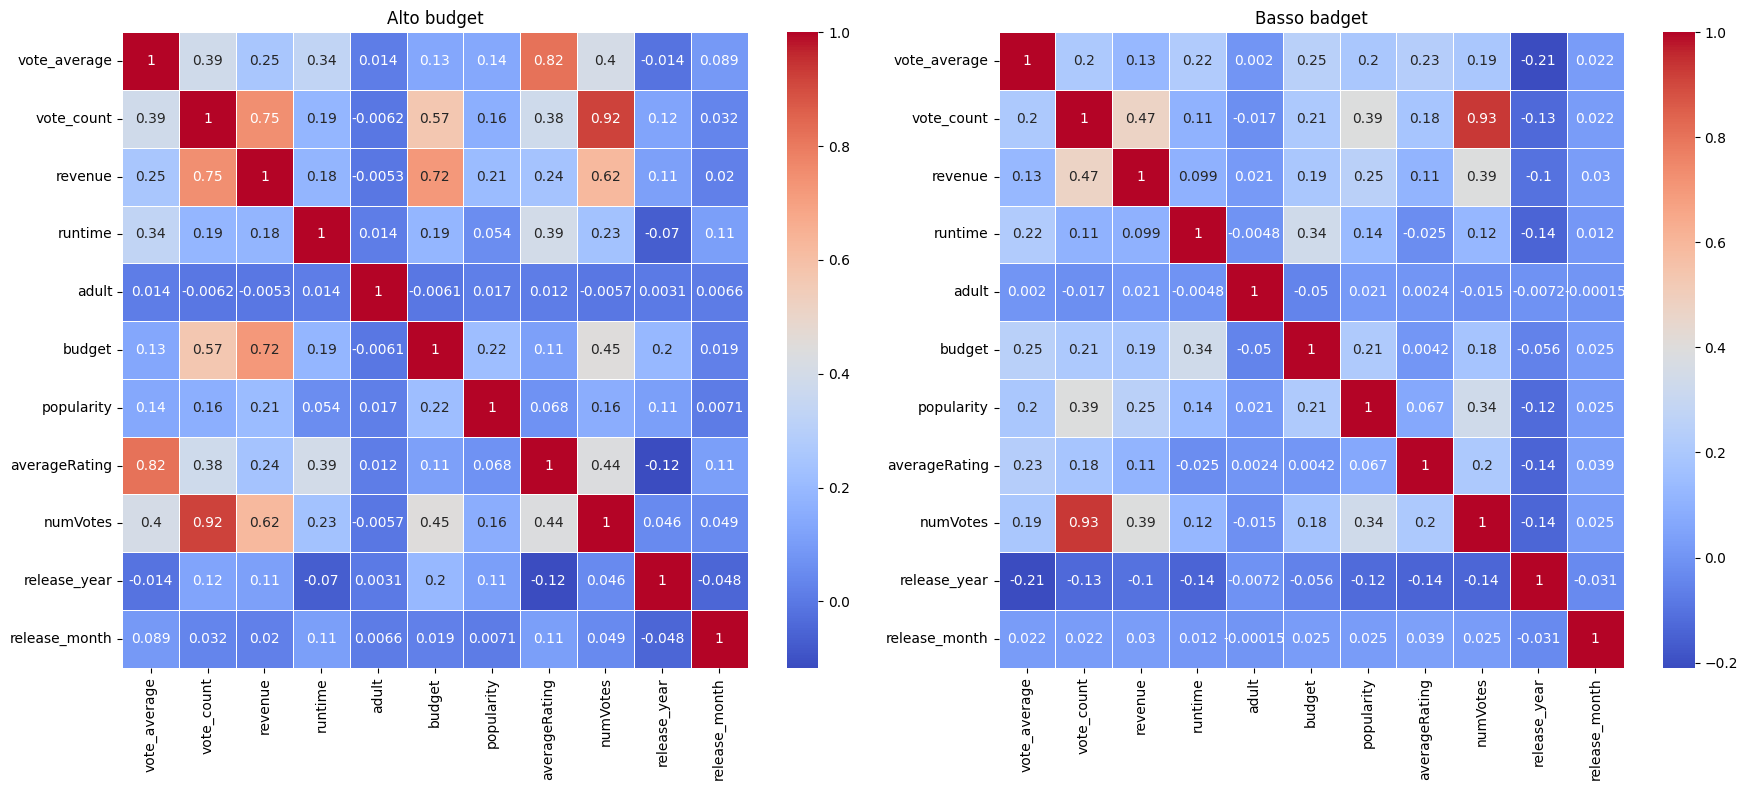

In [74]:
df_budget_not_zero = new_df[new_df['budget']>0].copy()

# Essendo una distribuzione non gaussiana utilizzo la mediana
budget_media = df_budget_not_zero['budget'].median()
print('Mediana del budget:',budget_media)
# budget_media
height_budget = df_budget_not_zero[df_budget_not_zero['budget']>=budget_media]
low_budget = df_budget_not_zero[df_budget_not_zero['budget']<budget_media]

corr_height = height_budget.corr()
corr_low = low_budget.corr()

# Creazione della figura e dei subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# Heatmap nel primo subplot
sns.heatmap(corr_height, annot=True, ax=axes[0], cmap='coolwarm', linewidths=0.5)
axes[0].set_title("Alto budget")

# Heatmap nel secondo subplot
sns.heatmap(corr_low, annot=True,ax=axes[1], cmap='coolwarm', linewidths=0.5)
axes[1].set_title("Basso badget")

# Mostra il grafico
plt.tight_layout()
plt.show()

- I film ad alto budget in generale sembrano avere più correlazioni con molti campi
    - Si puòl notarare che il runtime ora ha una correlazione  con la media dei voti, cosa che non si osservava precedentemente.
- I film a basso budget hanno meno correlazioni in generale e in alcuni casi quelle che hanno sono differenti dai primi.
    - In questo caso esiste una correlazione fra popularity e vote_count/numVotes, oppure tra rruntime e budget
    - La correlazione fra voto medio e rating medio è diminuita, potrebbe significare un modo di giudicare il film diverso fra le due categorie votanti


### Vediamo cosa succede ai film con zero budget

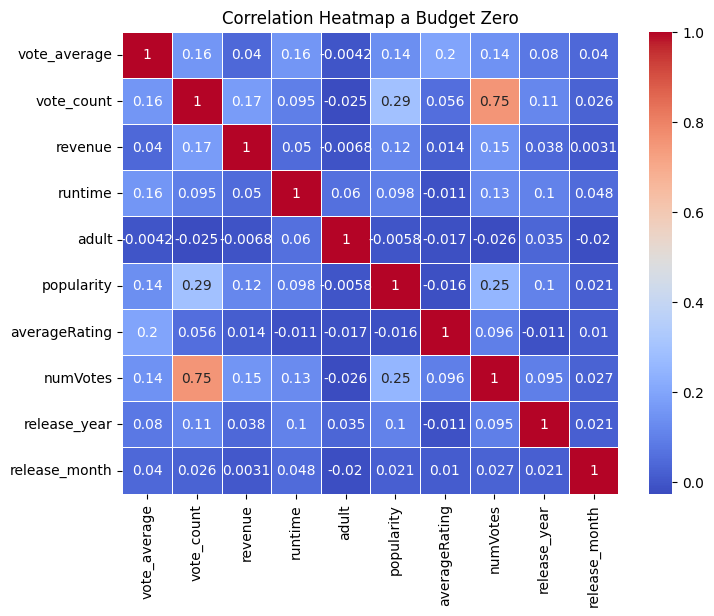

In [75]:
df_budget_zero = new_df[new_df['budget']==0].copy()
df_budget_zero.drop('budget', axis=1, inplace=True)
corr = df_budget_zero.corr()
# Plotting Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap a Budget Zero')
plt.show()

- é interessante notare come rispetto anche ai film a basso budget la correlazione fra il runtime e gli altri parametri sia sparita
- In generale non si notano particolari correlazioni

### Vediamo ora i film senza data di uscita se presentano qualche correlazione di interesse

In [76]:
new_df =  data_convet_to_heatmap(df_sn_data)
corr  = new_df.corr()

Elimino: title, len: 15844, <class 'str'>
Converto adult in 0 o 1
Elimino: original_language, len: 80, <class 'str'>
Elimino: original_title, len: 15868, <class 'str'>
Elimino: overview, len: 12123, <class 'str'>
Elimino: genres, len: 368, <class 'str'>
Elimino: production_companies, len: 689, <class 'str'>
Elimino: production_countries, len: 97, <class 'str'>
Elimino: spoken_languages, len: 79, <class 'str'>
Elimino: keywords, len: 130, <class 'str'>
Elimino: directors, len: 123, <class 'str'>
Elimino: writers, len: 106, <class 'str'>


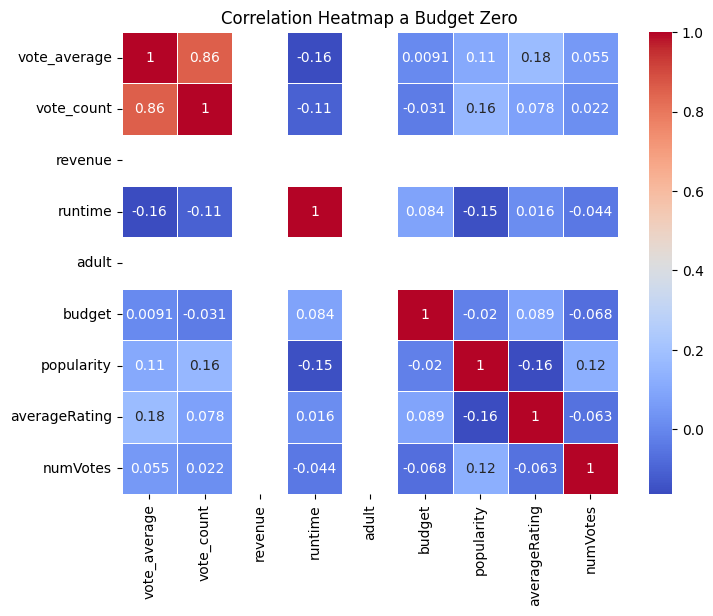

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap a Budget Zero')
plt.show()

- Non sembrano di particolare interesse

### Vediamo la differenza tra i film a 0 budget e con budget

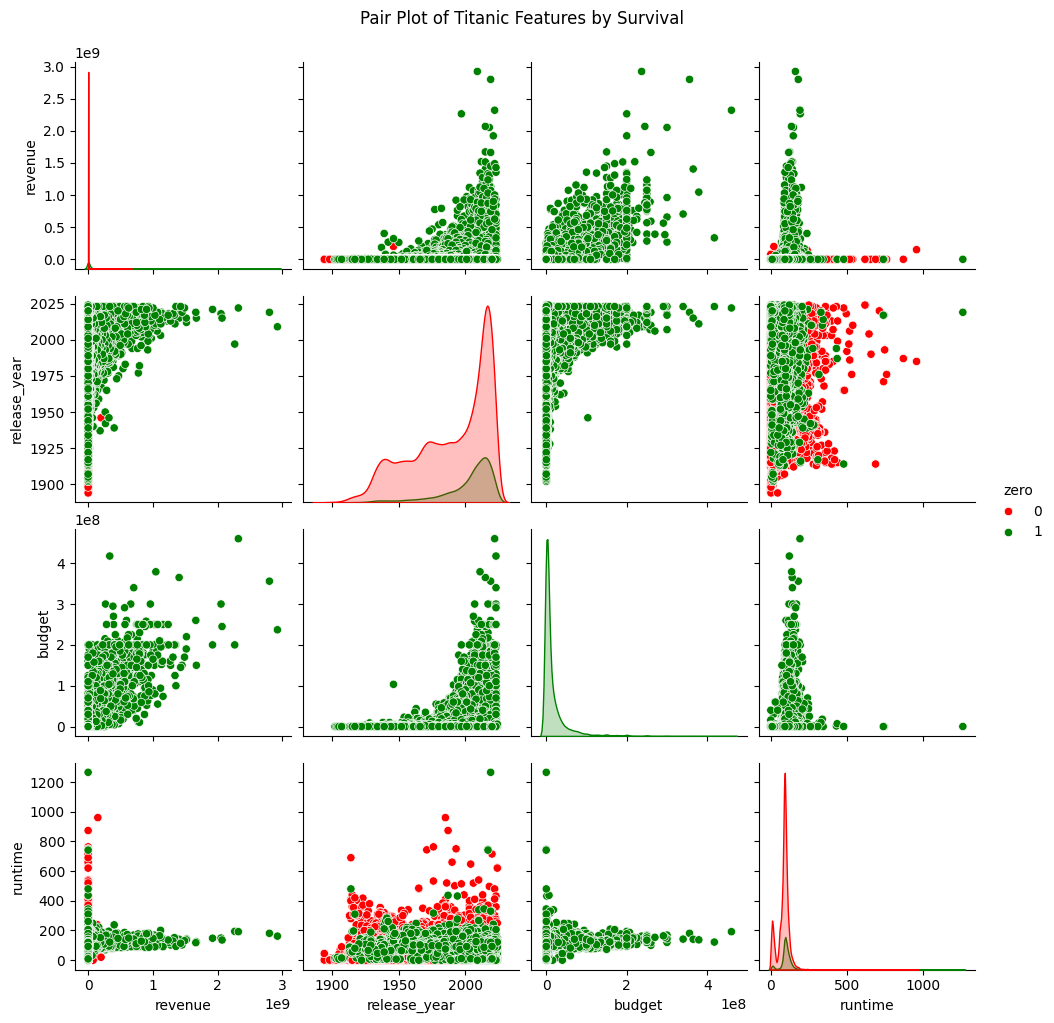

In [78]:
df_budget_zero['zero'] =0
df_budget_not_zero['zero'] =1
df_group= pd.concat([df_budget_zero, df_budget_not_zero], axis=0, ignore_index=True)
sns.pairplot(df_group[['revenue', 'release_year', 'budget', 'runtime', 'zero']], hue='zero', palette={0:'red', 1:'green'}, diag_kind='kde')
plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
plt.show()

##### Release_year - runtime
- Sembra che in genrale i film a 0 budget abbiamo una durata maggiore rispetto agli altri, inoltre si può notare come intorno al 1925 vi sia picco della durata solo dei film a 0 budget.
- Bisognerebbe indagare se questo aumento non sia stato limitato dalla 2 guerra mondiale, dato che dopo gli anni 50 vi è nuovamente un aumento della durata dwi film.
- Per i film con budget la durata non è cambiata molto dal 1925 circa.

##### Budget - runtime
- Si vede come vi sia una distribuzione molto alta intorno ad una precisa durata ed in quel punto si concentrino i film con buadget più altro

##### Budget - revenue
- Si può notare come ci sia una certa tendenza ad aumentare gli incassi all'aumentare del budget seppur ad occhio si vede come questa tendenza non sia lineare.
- Sembra che se si spenda il doppo non si ottenga poi il doppio degli incassi, ma un pò meno del doppio. Bisgnerebbe fare un fit.

##### Release_year - revenue
- Con il passare degli anni gli incassi dei film sono aumentati ma questo dato è scontato dato che non si è tenuto conto dell'inflazione e dell'aumento della popolazione.

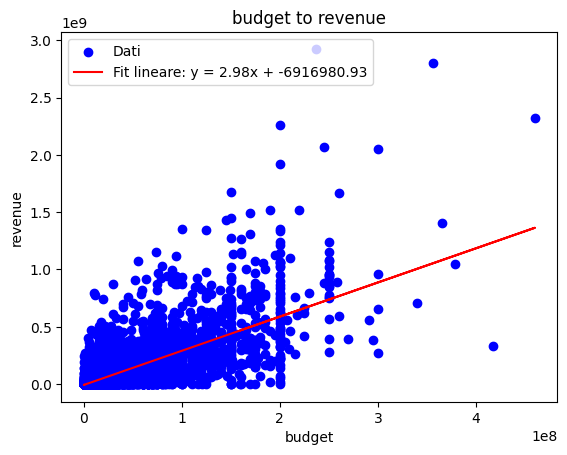

Pendenza: 2.9786653450286895
Intercetta: -6916980.925718948
Coefficiente di correlazione (R): 0.7481213361481374


In [79]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

x = df_budget_not_zero['budget']
y = df_budget_not_zero['revenue']
# Calcolo della regressione lineare
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Visualizzazione dei dati e della retta di regressione
plt.scatter(x, y, color='blue', label='Dati')
plt.plot(x, slope * x + intercept, color='red', label=f'Fit lineare: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('budget to revenue')
plt.legend()
plt.show()

# Risultati
print(f"Pendenza: {slope}")
print(f"Intercetta: {intercept}")
print(f"Coefficiente di correlazione (R): {r_value}")

- Si può notare che se voglio raddoppiare gli incassi devo tripricare il budget in media

## Vediamo ora la top 5 dei migliori registi (come incassi)

In [80]:
df.sort_values(by='revenue', ascending=True, inplace=False)
df_registi_unici = df.drop_duplicates(subset='directors')
# Prendere i primi 5 valori unici
primi_5_registi = df_registi_unici['directors'].head(5).reset_index()
primi_5_registi.drop('index', axis=1, inplace=True)
primi_5_registi

,directors
0,Christopher Nolan
1,James Cameron
2,Joss Whedon
3,Tim Miller
4,"Anthony Russo, Joe Russo"


### Vediamo come sono andati negli anni questi registi

<Figure size 2000x600 with 0 Axes>

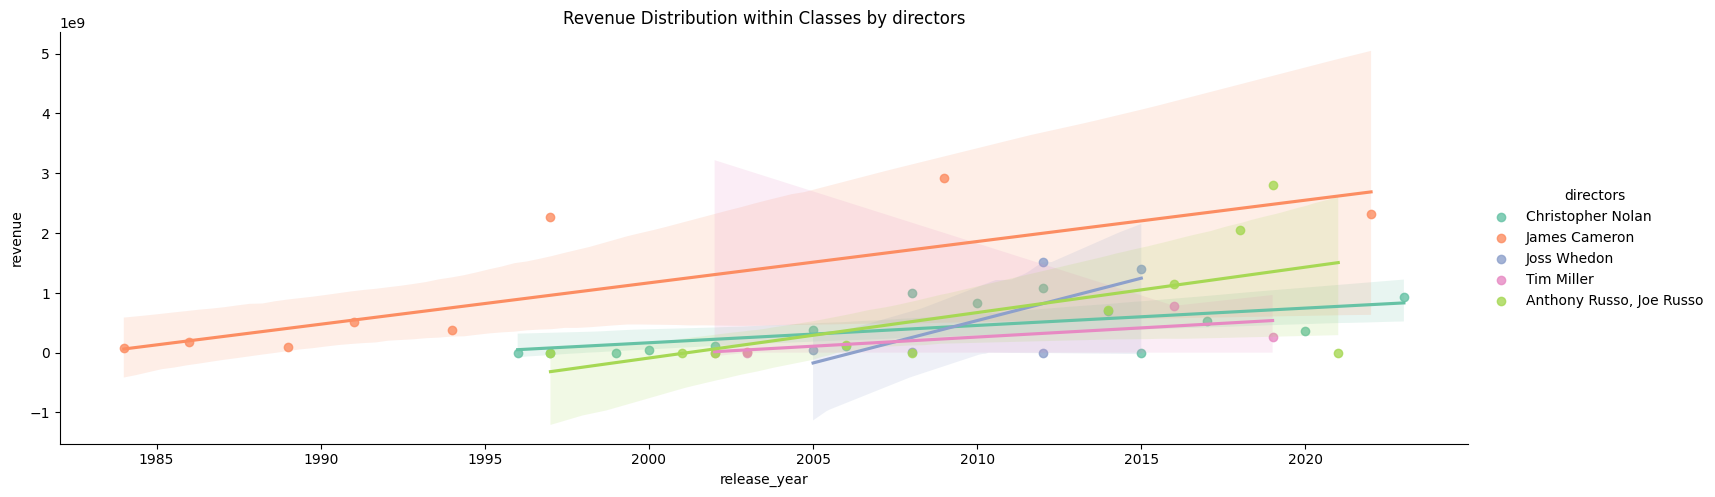

In [81]:

df_temp = df[['directors', 'revenue', 'release_year']]
df_temp = df_temp[df_temp['directors'].isin(primi_5_registi['directors'])]
# df_temp
plt.figure(figsize=(20,6))
sns.lmplot(x='release_year', y='revenue', hue='directors', data=df_temp, aspect=3., palette='Set2')
plt.title('Revenue Distribution within Classes by directors')
plt.show()

- Si può notare che tra i 5 migliori registi come incassi spicchi James Cameron, tuttavia questo non sia quello con la crescita più repentina nel corso degli anni

### Vediamo se cambia la situazione considerando il guadagno netto

<Figure size 2000x600 with 0 Axes>

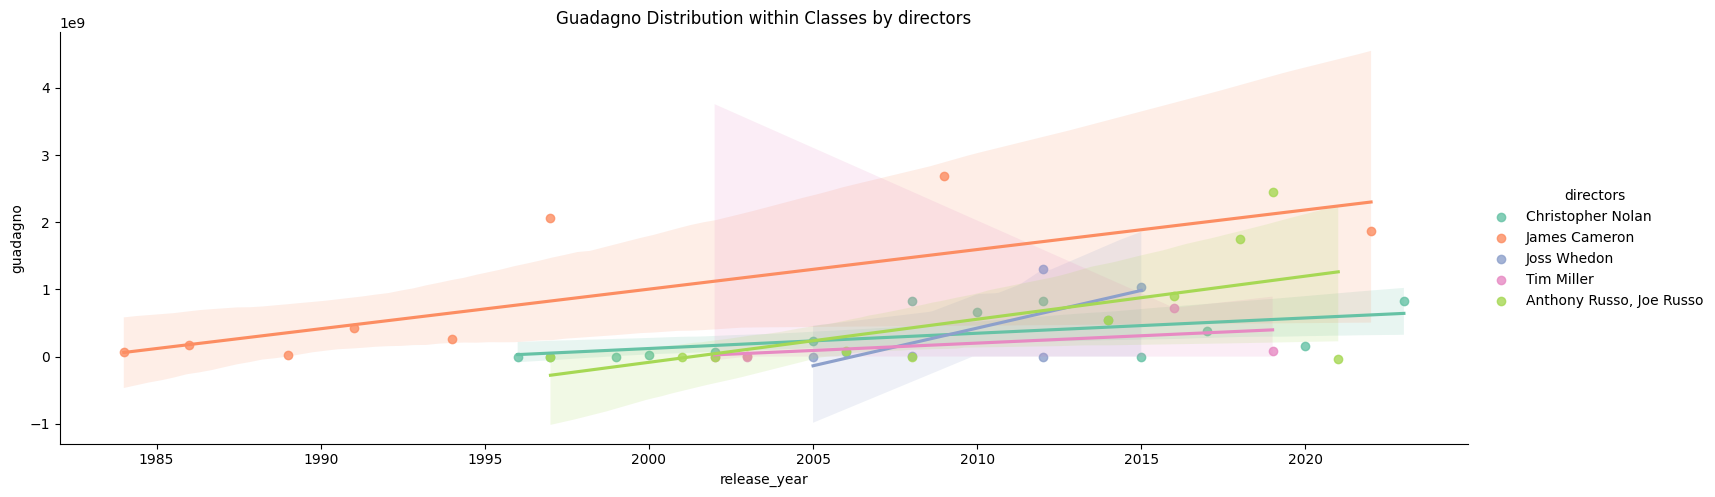

In [82]:
df_temp = df[['directors', 'revenue', 'release_year', 'budget']]
df_temp = df_temp[df_temp['directors'].isin(primi_5_registi['directors'])]
df_temp['guadagno'] = df_temp['revenue']- df_temp['budget']
# df_temp
plt.figure(figsize=(20,6))
sns.lmplot(x='release_year', y='guadagno', hue='directors', data=df_temp, aspect=3., palette='Set2')
plt.title('Guadagno Distribution within Classes by directors')
plt.show()

- La situazione è identica